In [52]:
import requests
from bs4 import BeautifulSoup
import requests
from paperview.retrieval.biorxiv_api import (
    Article, ArticleDetail
)
from paperview.retrieval import pdf_extraction
from paperview.retrieval import process_xml
import tempfile
from io import StringIO
from PIL import Image
import seaborn as sns
import pandas as pd
from io import StringIO

import pdfplumber

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
# url = 'https://www.biorxiv.org/content/10.1101/2022.07.21.500746v1'
# url = 'https://www.biorxiv.org/content/10.1101/456574v1'
# url = 'https://www.biorxiv.org/content/10.1101/2022.12.21.521407v1?rss=1'
# url = 'https://www.biorxiv.org/content/10.1101/2022.09.12.507457v1.full'
# url = 'https://www.biorxiv.org/content/10.1101/386375v1.full'
# url = 'https://www.biorxiv.org/content/10.1101/2022.07.20.500837v1?rss=1'
# url = 'https://www.biorxiv.org/content/10.1101/180125v2.full'
# url = 'https://www.biorxiv.org/content/10.1101/2022.06.26.497672v3?rss=1'
# url = 'https://www.biorxiv.org/content/10.1101/2023.01.10.523450v1?rss=1'
url = 'https://www.biorxiv.org/content/10.1101/2023.01.20.524874v1'


In [64]:
article = Article.from_content_page_url(
    url, 
    prog_bar=True,
    extract_images=False,
    )
savedir = article._mkdir(root='/home/naka/code/side/paperview/paperview/examples')
article._save_metadata(savedir/'metadata.json')
article._save_jatsxml(savedir/'jats.xml')

100%|██████████| 39/39 [00:08<00:00,  4.60it/s]


In [67]:
article.jatsxml.full_xml_retrieved

False

In [55]:
list(example_dir.glob('**/*.json'))[0].as_posix()

PosixPath('/home/naka/code/side/paperview/paperview/examples/10.1101/456574/metadata.json')

In [ ]:
{url: }

In [56]:
ArticleDetail.from_json(list(example_dir.glob('**/*.json'))[0]).content_url

'https://www.biorxiv.org/content/10.1101/456574v1'

In [46]:
article.data['figure_captions']

,section,id,caption,label,xref_id,slug,slug_backup
0,Results,3.2.1.2,Optogenetic circuit mapping reveals complement...,Figure 1.,fig1,F1,F1
1,Results,3.2.1.6,L4 photo-stimulation excites L5 XCs but not L5...,Figure 2.,fig2,F2,F2
2,Results,3.2.2.3,2 photon optogenetic circuit mapping reveals t...,Figure 3.,fig3,F3,F3
3,Results,3.2.3.3,MCs and XCs exhibit different patterns of mono...,Figure 4.,fig4,F4,F4


In [44]:
article.data['images']

[{'section': 'Results',
  'id': '3.2.1.2',
  'caption': 'Optogenetic circuit mapping reveals complementary synaptic input patterns to two subtypes of L5 SOM cells. (A) Confocal images of dye filled neurons revealing two morphological phenotypes of L5 SOM cells. Left: an L5 GIN cell. Right: an L5 X94 cell. Scale bar: 200 µm. (B) Example traces during current step injections from an L5 GIN cell (black) and an L5 X94 cell (red). (C) Left: Overlaid morphological reconstructions of L5 GIN/MC cells (black, n=14) and L5 X94/XC cells (red, n=10) showing differences in laminar distribution of neurites. Right: Normalized neurite density versus cortical depth for L5 GIN (black) and L5 X94 cells (red). Data are represented as mean ± C.I. (D) Schematic of experimental configuration. A digital micromirror device was used to focally photo-stimulate excitatory cells in different regions of the slice in order to map the spatial profile of excitatory inputs to GFP+ L5 MCs (Emx1-Cre; GIN) or GFP+ L5 XCs 

In [43]:
article.data.keys()

dict_keys(['xml_text', 'figure_captions', 'table_captions', 'all_text', 'images'])

In [40]:
article.article_detail.dict()

{'title': 'Complementary subnetworks of cortical somatostatin interneurons',
 'authors': ['Naka, A.',
  'Shababo, B.',
  'Snyder, B.',
  'Egladyous, A.',
  'Sridharan, S.',
  'Paninski, L.',
  'Adesnik, H.'],
 'date': '2018-10-30',
 'category': 'neuroscience',
 'doi': '10.1101/456574',
 'author_corresponding': 'Hillel  Adesnik',
 'author_corresponding_institution': 'UC Berkeley',
 'version': '1',
 'type': 'new results',
 'license': 'cc_by_nc',
 'abstract': 'The neocortex is organized into discrete layers of excitatory neurons: layer 4 receives the densest  bottom up projection carrying external sensory data, while layers 2/3 and 5 receive  top down inputs from higher cortical areas that may convey sensory expectations and behavioral goals. A subset of cortical somatostatin (SST) neurons gate top down input and control sensory computation by inhibiting the apical dendrites of pyramidal cells in layers 2/3 and 5. However, it is unknown whether an analogous inhibitory mechanism separately

In [20]:
Image.open('https://www.biorxiv.org/content/early/2022/07/22/2022.07.21.500746/F8.large.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'https://www.biorxiv.org/content/early/2022/07/22/2022.07.21.500746/F8.large.jpg'

In [68]:
article.data['figure_captions']

,section,id,caption,label,xref_id
0,Graphical abstract,2.2.2,,,ufig1
1,Materials and Methods,3.2.2.2,Five hundred and eighty-six dogs were screened...,Fig. 1,fig1
2,Materials and Methods,3.2.6.8,DAG (directed acyclic graph) represents the me...,Fig. 2,fig2
3,Results,3.3.2.2.2,Canine frailty index scores in the different a...,Fig. 3,fig3
4,Results,3.3.2.3.2,Canine frailty index (CFI) scores in the diffe...,Fig. 4,fig4
5,Results,3.3.3.2.2,a. Total Health related quality of life (HRQL)...,Fig. 5,fig5
6,Results,3.3.3.3.2,a. Total Health Related Quality of Life (HRQL)...,Fig. 6,fig6
7,Results,3.3.4.2,a. Scatter plots of total Health Related Quali...,Fig. 7,fig7
8,Results,3.3.5.2,The most common Canine Frailty Index (CFI) Fea...,Fig. 8,fig8


In [18]:
article.data['images'][1]

{'section': 'Materials and Methods',
 'id': '3.2.2.2',
 'caption': 'Five hundred and eighty-six dogs were screened for eligibility. Dogs without life-threatening acute disease, hypoadrenocorticism or diabetes were included if age was verified to be ≥2 and <6 years (young) or ≥7 years (old) and if body weight was < 25 lbs (small) or > 50 lbs (large). Of 586 dogs, 90 dogs were excluded primarily because age could not be verified or when age/weight criteria were not met (n = 87). Two dogs received a prohibited medication and 1 dog was excluded due to a history of diabetes mellitus. Four hundred and ninety-six met the inclusion criteria for enrollment of which 45 dogs were subsequently excluded due to owner non-compliance (n = 43), subject non-compliance (n = 1), or disease identified on evaluation of physical exam or bloodwork (n = 1). Four hundred and fifty-one dogs were analyzed of which 55 were young and small, 117 old and small, 127 young and large, and 152 old and large',
 'label': '

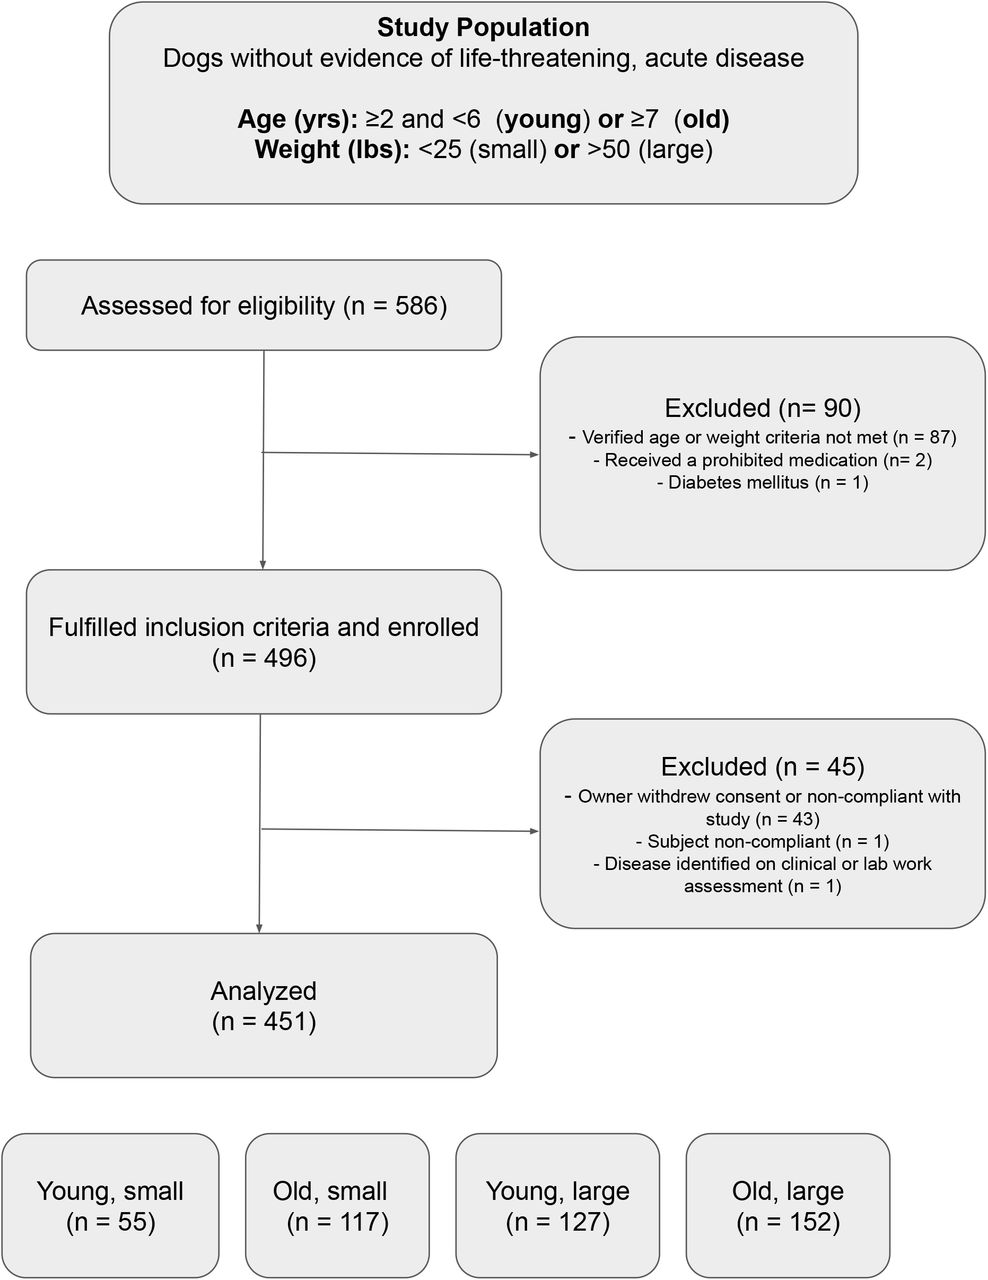

In [23]:
article.data['images'][1]['image']

In [26]:
article.article_detail.jatsxml

'https://www.biorxiv.org/content/early/2022/07/22/2022.07.21.500746.source.xml'

In [24]:
article.jatsxml

In [ ]:
article.get_overview().display()

In [12]:
article.article_detail.get_image_url('F1')

'https://www.biorxiv.org/content/early/2022/07/22/2022.07.21.500746/F1.large.jpg'

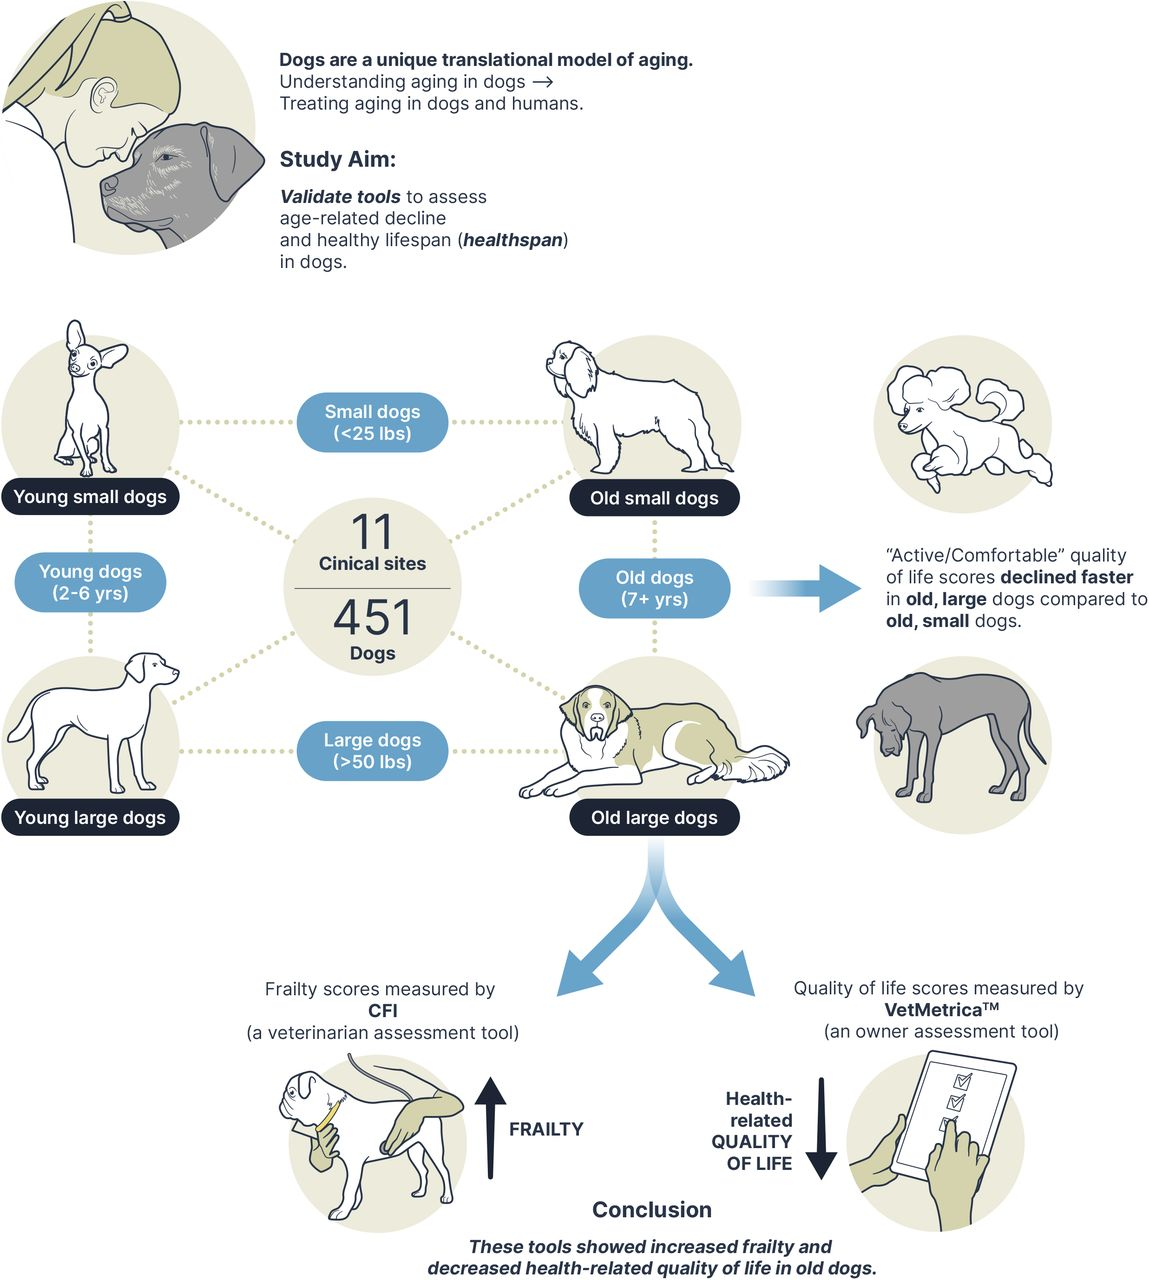

In [27]:
article.article_detail.get_image('F1')

In [78]:
xmlstr = article.article_detail.retrieve_jats_xml()

In [90]:
text = process_xml.xmlstr_to_dict(xmlstr)
df = pd.DataFrame(text['body_sections'])
sections = df.query('level == 2').set_index('title')['id'].to_dict()
texts = []
figures = []
tables = []
for sec_title, sec_id in sections.items():
    subsection_idx = df.id.str.startswith(sec_id)
    subsections = df.loc[subsection_idx]
    
    for subsec_id, subsection in subsections.set_index('id').iterrows():
        contents = subsection['contents']
        for content in contents:
            if content.get('tag') == 'p':
                texts.append({
                    'section': sec_title,
                    'id': content['id'],
                    'text': content['text']
                })
            elif content.get('tag') == 'fig':
                
                figures.append({
                    'section': sec_title,
                    'id': content['id'],
                    'caption': content['caption'],
                    'label': content['label'],
                    'xref_id': content.get('xref_id')
                })
                dodo = content
            elif content.get('tag') == 'table':
                tables.append({
                    'section': sec_title,
                    'id': content['id'],
                    'caption': content['caption'],
                    'label': content['label'],
                    'xref_id': content.get('xref_id')
                })

texts = pd.DataFrame(texts)
figures = pd.DataFrame(figures)
tables = pd.DataFrame(tables)

In [52]:
article.data['figure_captions']

,section,id,caption,label,xref_id,slug
0,Graphical abstract,2.2.2,,,ufig1,None
1,Materials and Methods,3.2.2.2,Five hundred and eighty-six dogs were screened...,Fig. 1,fig1,F2
2,Materials and Methods,3.2.6.8,DAG (directed acyclic graph) represents the me...,Fig. 2,fig2,F3
3,Results,3.3.2.2.2,Canine frailty index scores in the different a...,Fig. 3,fig3,F4
4,Results,3.3.2.3.2,Canine frailty index (CFI) scores in the diffe...,Fig. 4,fig4,F5
5,Results,3.3.3.2.2,a. Total Health related quality of life (HRQL)...,Fig. 5,fig5,F6
6,Results,3.3.3.3.2,a. Total Health Related Quality of Life (HRQL)...,Fig. 6,fig6,F7
7,Results,3.3.4.2,a. Scatter plots of total Health Related Quali...,Fig. 7,fig7,F8
8,Results,3.3.5.2,The most common Canine Frailty Index (CFI) Fea...,Fig. 8,fig8,F9


In [95]:
# use lxml to open xmlstr
from lxml import etree
root = etree.fromstring(xmlstr)

In [100]:
# find element with label = Fig. 1
label = 'Fig. 1'


In [125]:
f'https://www.biorxiv.org/content/{self.doi}v{self.version}.full.pdf'

In [13]:

base_xml_url = article.article_detail.jatsxml.split('.source.xml')[0]

In [15]:
f'{base_xml_url}/{slug}.large.jpg'

# get image from url
from urllib.request import urlopen
from io import BytesIO
from PIL import Image

url = f'{base_xml_url}/{slug}.large.jpg'
with urlopen(url) as response:
    with BytesIO(response.read()) as file:
        img = Image.open(file)
        img.show()


In [21]:
slug = 'F1'
url = f'{base_xml_url}/{slug}.large.jpg'
with urlopen(url) as response:
    with BytesIO(response.read()) as file:
        img = Image.open(file)
        # img.show()
        img.width

In [22]:
img

ValueError: Could not save to PNG for display

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1149x1280>

In [35]:
df.loc['3.3.2.1', 'contents']

[{'tag': 'p',
  'text': 'The distribution of CFI scores was wider in old dogs compared to young dogs. The distribution of the CFI scores in each age-size group was non-normal with positive skew. CFI scores in the evaluable population of dogs (n = 450) ranged from 0.0 to 0.59, with a median of 0.03, and IQR of 0.09. IQRs of CFI scores in old dog groups were larger than that of young dog groups (Table 3).',
  'id': '3.3.2.1.1'},
 {'tag': 'table',
  'xref_id': 'tbl3',
  'xref_url': 'https://www.ncbi.nlm.nih.gov/pmc/articles//table/tbl3',
  'label': 'Table 3',
  'caption': 'Canine Frailty Index (CFI) and Health Related Quality of Life (HRQL) Scores across age-size groups with mean, standard deviation, interquartile range, range (minimum, maximum), and p-values for Kruskal-Wallis Tests showing significant differences across age-size groups',
  'footer': '',
  'media': [],
  'graphics': ['500746v1_tbl3', '500746v1_tbl3a'],
  'table_columns': [],
  'table_values': [],
  'xml': '',
  'id': '3.

In [25]:
df.loc[2, 'contents']

[{'tag': 'p',
  'text': 'Graphical summary of the design, results, and conclusions of the study.',
  'id': '2.2.1'},
 {'tag': 'fig',
  'caption': '',
  'xref_url': 'https://www.ncbi.nlm.nih.gov/pmc/articles//figure/ufig1',
  'xref_id': 'ufig1',
  'label': '',
  'media': [],
  'graphics': ['500746v1_ufig1'],
  'pmcid': '',
  'id': '2.2.2'}]